In [ ]:
#Use CSV file titled 'Questions_wHum_chatgpt_cleaned_sentiment_LIWC'
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))

df

In [ ]:
df.columns

Index(['Question', 'Human', 'Chatgpt', 'Human_Polarity', 'Human_Subjectivity',
       'chatgpt_Polarity', 'chatgpt_Subjectivity', 'Human_WC',
       'Human_Analytic', 'Human_Clout',
       ...
       'chatgpt_Comma', 'chatgpt_Colon', 'chatgpt_SemiC', 'chatgpt_QMark',
       'chatgpt_Exclam', 'chatgpt_Dash', 'chatgpt_Quote', 'chatgpt_Apostro',
       'chatgpt_Parenth', 'chatgpt_OtherP'],
      dtype='object', length=193)

In [ ]:
docs1 = df['Chatgpt'].tolist() #where df is the original dataframe with 3 columns -- question, chatgpt's response and human's response

In [ ]:
docs2 = df['Human'].tolist()

In [ ]:
#removing stopwords

import nltk
from nltk.corpus import stopwords
import re
from nltk import ngrams

nltk.download('stopwords')
swords = (stopwords.words('english'))
swords = [re.sub(r'\W+','',word.lower()) for word in swords]
swords.append('chatgpt')
swords.append('http')
swords.append('https')
swords.append('en')
swords.append('org')
swords.append('should')
swords.append('could')
swords.append('would')
swords.append('will')
swords.append('explainlikeimfive')
swords.append('www')
swords.append('com')


for i in range(len(docs1)):
    vals = (re.sub(r'\W+', ' ', docs1[i].lower())).split(' ')
    words = [word for word in vals if word not in swords and len(word)>1]
    docs1[i]=' '.join(words)


for i in range(len(docs2)):
    vals = (re.sub(r'\W+', ' ', docs2[i].lower())).split(' ')
    words = [word for word in vals if word not in swords and len(word)>1]
    docs2[i]=' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#uni bi and trigrams
import operator
from nltk import ngrams

unigrams={}
bigrams={}
trigrams={}
for i in range(len(docs1)):
    vals=docs1[i].split(' ')
    for va in vals:
        try:
            unigrams[va] = unigrams[va]+1
        except:
            unigrams[va]=1
    bgrams = ngrams(vals, 2)
    for bi in bgrams:
        try:
            bigrams[str(bi[0])+'-'+str(bi[1])] += 1
        except:
            bigrams[str(bi[0])+'-'+str(bi[1])]=1
    tgrams = ngrams(vals, 3)
    for tri in tgrams:
        try:
            trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]] = trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]] + 1
        except:
            trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]]=1

ug = sorted(unigrams.items(), key=operator.itemgetter(1), reverse=True)
bg = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
tg = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

for i in range(10):
    print(ug[i][0] + ' '+str(ug[i][1]))

for i in range(10):
    print(bg[i][0] + ' '+str(bg[i][1]))

for i in range(10):
    print(tg[i][0] + ' '+str(tg[i][1]))

may 1802
important 1278
different 1005
like 991
factors 983
often 866
various 859
note 857
time 789
however 776
important-note 803
united-states 251
worth-noting 174
various-factors 166
however-important 156
factors-including 109
vary-depending 108
several-reasons 104
economic-growth 97
important-remember 96
however-important-note 131
feel-free-ask 69
consult-healthcare-professional 56
always-good-idea 54
let-know-questions 53
various-factors-including 52
vary-person-person 49
hope-explanation-helps 35
influenced-various-factors 35
good-idea-consult 30


In [ ]:
#uni bi and trigrams
import operator
from nltk import ngrams

unigrams={}
bigrams={}
trigrams={}
for i in range(len(docs2)):
    vals=docs2[i].split(' ')
    for va in vals:
        try:
            unigrams[va] = unigrams[va]+1
        except:
            unigrams[va]=1
    bgrams = ngrams(vals, 2)
    for bi in bgrams:
        try:
            bigrams[str(bi[0])+'-'+str(bi[1])] += 1
        except:
            bigrams[str(bi[0])+'-'+str(bi[1])]=1
    tgrams = ngrams(vals, 3)
    for tri in tgrams:
        try:
            trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]] = trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]] + 1
        except:
            trigrams[tri[0]+'-'+tri[1]+'-'+tri[2]]=1

ug = sorted(unigrams.items(), key=operator.itemgetter(1), reverse=True)
bg = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
tg = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

for i in range(10):
    print(ug[i][0] + ' '+str(ug[i][1]))

for i in range(10):
    print(bg[i][0] + ' '+str(bg[i][1]))

for i in range(10):
    print(tg[i][0] + ' '+str(tg[i][1]))

people 1713
like 1597
one 1349
get 1118
time 917
make 820
money 817
also 786
much 729
things 724
wikipedia-wiki 194
year-old 94
tl-dr 93
even-though 85
speed-light 81
let-say 75
things-like 69
lot-people 65
pretty-much 63
many-people 61
five-year-old 38
upload-wikimedia-wikipedia 14
swing-set-kids 14
way-debt-free 11
time-warner-cable 11
wikimedia-wikipedia-commons 10
long-time-ago 10
get-money-back 10
debt-free-clinton 10
buffalo-buffalo-buffalo 9


In [ ]:
#!pip install bertopic

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model1 = BERTopic()
topics1, probs1 = topic_model1.fit_transform(docs1)
print(topics1)

[-1, 17, 2, -1, 0, 5, 30, 0, 29, 14, -1, -1, 6, -1, 6, 37, 18, -1, 23, -1, 4, 8, -1, 1, 19, 40, 10, 31, -1, -1, 16, 31, 29, 20, 1, 5, 11, 0, 39, -1, -1, -1, -1, -1, -1, -1, 7, 8, 43, 42, 0, 9, 1, -1, 8, 42, -1, 0, 1, 15, 33, 8, 15, 11, 0, 1, 17, 7, -1, -1, -1, 34, 4, -1, 1, 3, 17, -1, 2, 9, 35, -1, 9, 22, -1, -1, 13, 4, -1, 36, 24, 7, -1, 39, 29, -1, 18, 1, 14, 7, -1, 32, 21, 17, 14, -1, 21, -1, 11, 3, 34, -1, 5, 20, 0, 2, -1, 25, 16, -1, 4, 13, 22, 5, -1, 4, -1, 20, 0, 13, 4, 30, 44, 21, 21, -1, 16, 22, 2, 6, 31, 7, 33, 14, 14, 5, 24, 2, 37, 15, 5, -1, -1, 14, 24, 0, 41, 28, -1, 1, -1, 3, 4, 1, 13, 6, 2, -1, 8, 5, -1, 8, 42, 10, -1, 10, 29, 1, 13, 8, 21, 12, -1, 26, 2, 13, 19, 18, 34, -1, 11, 8, 2, 2, -1, -1, 18, 6, 14, 29, -1, -1, 2, -1, 19, 16, 1, 34, -1, 8, 19, 28, 1, -1, 22, 10, 23, 18, 30, 6, 17, 2, 13, 30, 0, 33, -1, 6, 0, 26, 0, 0, 2, 27, -1, -1, -1, -1, 6, -1, 3, -1, 32, 37, -1, -1, 1, 34, 19, 15, 2, 28, 3, 4, 2, 25, -1, 11, 46, 3, -1, -1, 20, 0, 21, -1, 47, 0, 19, -1, 23, 31,

In [ ]:
topic_model2 = BERTopic()
topics2, probs2 = topic_model2.fit_transform(docs2)
print(topics2)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
topic_model1.visualize_barchart()

In [ ]:
topic_model2.visualize_barchart()

In [ ]:
#Use CSV File titled 'Questions_wText_cleaned_sentiment_LIWC_'
from google.colab import files
uploaded = files.upload()

Saving Questions_wHum_chatgpt_cleaned_sentiment_LIWC_2.csv to Questions_wHum_chatgpt_cleaned_sentiment_LIWC_2.csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df

,Question,Text,Human or ChatGPT,Polarity,Subjectivity,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,what rights are gays actually being denied whi...,note that i m assuming you mean under us law t...,0,0.084821,0.318750,137,90.10,76.73,2.78,67.17,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.84
1,why honey never expires edit what other foods...,food goes bad when tiny things grow in it in o...,0,-0.177500,0.453333,36,54.29,71.09,98.01,2.09,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,why is bandwidth measured in bits when everyth...,actually it is because the focus of the two te...,0,0.075000,0.415000,83,70.89,59.52,18.69,48.10,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,why evolution is still considered a theory se...,a scientific theory is not simply a guess that...,0,0.200000,0.511429,86,89.37,71.95,34.47,69.60,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,how should i teach a 5 year old what it means ...,i think its enough to work on his empathy in t...,0,0.212243,0.538405,842,21.85,97.04,13.89,72.47,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,what does a chipset do whenever someone leave...,Certainly! A chipset is like the brain of your...,1,0.169963,0.543742,190,86.88,84.14,1.84,74.74,...,0.0,0.0,0.0,0.0,1.05,0.00,1.05,1.58,1.05,0.53
3770,anyone interested in a general description of ...,Certainly! I can provide you with a general de...,1,0.078759,0.363722,338,98.44,59.35,10.91,53.59,...,0.0,0.0,0.0,0.0,0.30,0.30,0.00,0.59,1.78,0.00
3771,can someone explain offshore bank accounts es...,Certainly I can explain offshore bank account...,1,-0.029870,0.372619,191,79.48,50.00,3.97,34.88,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.52,0.00,0.00
3772,how does satellite television work i mean doe...,Satellite television works by broadcasting TV ...,1,-0.023810,0.328571,165,94.31,89.83,28.41,36.42,...,0.0,0.0,0.0,0.0,0.00,3.03,0.00,0.61,0.00,0.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import operator

df.drop(columns=['Question', 'Text '], inplace=True)

X = df.drop(columns=['Human or ChatGPT'], axis=1)
y = df['Human or ChatGPT']
rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_

featnames = list(X.columns)


rankfeats = dict(zip(featnames,feature_importances))

sorted_rf = sorted(rankfeats.items(), key=operator.itemgetter(1), reverse=True)

for i in range(len(sorted_rf)):
  print(sorted_rf[i][0]+': '+str(sorted_rf[i][1]))

Period: 0.22179172189902605
AllPunc: 0.19475427141647553
WPS: 0.11971913995624398
Apostro: 0.0849875884693963
Sixltr: 0.08447278986971322
Dash: 0.0558191334293194
Colon: 0.029762927000984978
pronoun: 0.028123595977194178
WC: 0.017058308790840148
ppron: 0.016721060986845268
Quote: 0.013983308580365707
Parenth: 0.013455214223788198
adverb: 0.012113219196671018
conj: 0.0090086462897753
verb: 0.008680655990114685
Exclam: 0.007715976267950595
function: 0.0062825439253899095
Analytic: 0.004298103351782019
tentat: 0.004200935256151711
work: 0.003542293820671009
insight: 0.0033385118870872914
achieve: 0.0031250973438674812
i: 0.003093335474102793
compare: 0.0029221059256372872
ipron: 0.0025398336092490774
posemo: 0.0024493403868937513
time: 0.0021357966132766614
you: 0.002114581897828222
prep: 0.001991609841744088
OtherP: 0.0019871182888791163
focuspresent: 0.001985465984420745
informal: 0.0017764298974735115
differ: 0.0016906920287634575
male: 0.001658180935552602
adj: 0.0016511594970198523
d

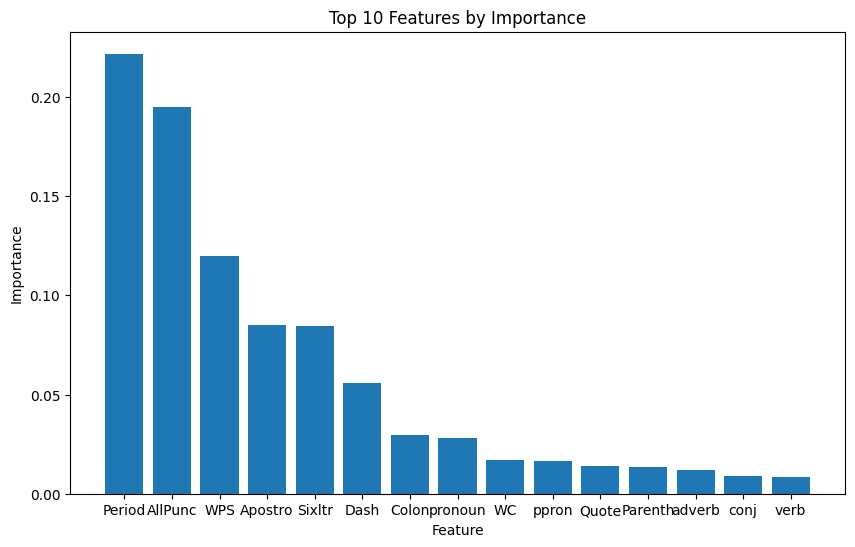

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(15), [val[1] for val in sorted_rf[0:15]], tick_label=[val[0] for val in sorted_rf[0:15]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Features by Importance")
plt.show()


In [ ]:
top_features_xgb = []
for i in range(15
               ):
  top_features_xgb.append(sorted_rf[i][0])
top_features_xgb

['Period',
 'AllPunc',
 'WPS',
 'Apostro',
 'Sixltr',
 'Dash',
 'Colon',
 'pronoun',
 'WC',
 'ppron',
 'Quote',
 'Parenth',
 'adverb',
 'conj',
 'verb']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_std = StandardScaler().fit_transform(X)

linreg = LinearRegression().fit(X_std,y)

rankings = linreg.coef_

featnames = list(X.columns)

rankfeats = dict(zip(featnames,rankings))

sorted_Lr = sorted(rankfeats.items(), key=operator.itemgetter(1), reverse=True)

for i in range(len(sorted_Lr)):
  print(sorted_Lr[i][0]+': '+str(sorted_Lr[i][1]))

OtherP: 1.7681466792981133
Period: 1.7349399632200817
ppron: 1.6746221301065676
Quote: 0.5907705041135849
Apostro: 0.5280625639306566
Colon: 0.44870024314261037
Dash: 0.41641214736472
Parenth: 0.3902833664831797
WC: 0.19587688603782313
QMark: 0.12917108202161962
Exclam: 0.12904644759748407
Sixltr: 0.04098895488895835
Comma: 0.03510526564272859
SemiC: 0.02579521671308864
affect: 0.023165704205518833
Dic: 0.02290472693084634
conj: 0.01574526336796505
auxverb: 0.015536430666357579
tentat: 0.014674988547429074
ipron: 0.013501058105740477
prep: 0.013027047505616573
time: 0.008720895112218185
Analytic: 0.007124940417912826
interrog: 0.006812324745829268
achieve: 0.00619786857620952
anger: 0.005871347533746754
body: 0.005729689456973969
ingest: 0.005217653335459926
see: 0.004898541130597428
article: 0.004458442621204123
affiliation: 0.004445929780604985
feel: 0.003823703783830401
Authentic: 0.0036227823180763306
health: 0.0034970775024401463
Subjectivity: 0.003179058039300499
social: 0.003044

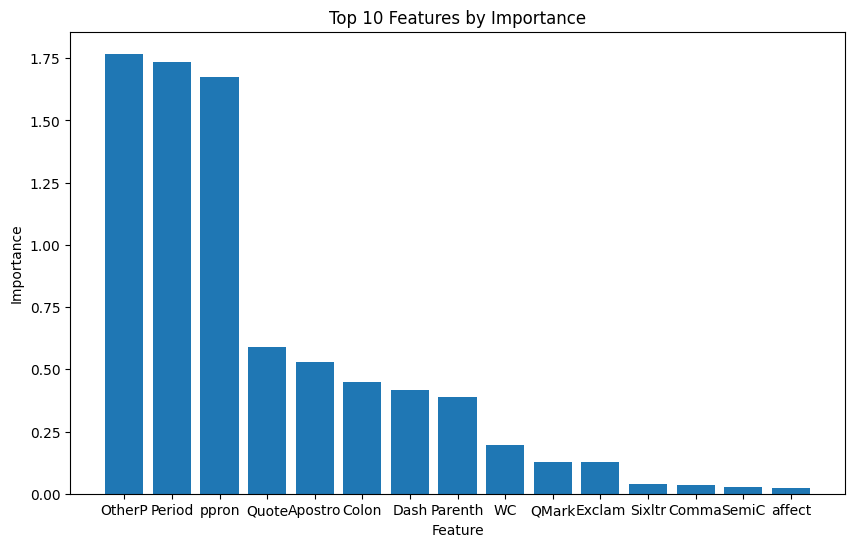

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(15), [val[1] for val in sorted_Lr[0:15]], tick_label=[val[0] for val in sorted_Lr[0:15]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Features by Importance")
plt.show()

In [ ]:
import xgboost as xgb

X = df.drop(columns=['Human or ChatGPT'])
y = df['Human or ChatGPT']

model = xgb.XGBClassifier()
model.fit(X, y)

featnames = list(X.columns)


rankfeats = dict(zip(featnames,feature_importances))

sorted_XGB = sorted(rankfeats.items(), key=operator.itemgetter(1), reverse=True)

for i in range(len(sorted_XGB)):
  print(sorted_XGB[i][0]+': '+str(sorted_XGB[i][1]))

Period: 0.22179172189902605
AllPunc: 0.19475427141647553
WPS: 0.11971913995624398
Apostro: 0.0849875884693963
Sixltr: 0.08447278986971322
Dash: 0.0558191334293194
Colon: 0.029762927000984978
pronoun: 0.028123595977194178
WC: 0.017058308790840148
ppron: 0.016721060986845268
Quote: 0.013983308580365707
Parenth: 0.013455214223788198
adverb: 0.012113219196671018
conj: 0.0090086462897753
verb: 0.008680655990114685
Exclam: 0.007715976267950595
function: 0.0062825439253899095
Analytic: 0.004298103351782019
tentat: 0.004200935256151711
work: 0.003542293820671009
insight: 0.0033385118870872914
achieve: 0.0031250973438674812
i: 0.003093335474102793
compare: 0.0029221059256372872
ipron: 0.0025398336092490774
posemo: 0.0024493403868937513
time: 0.0021357966132766614
you: 0.002114581897828222
prep: 0.001991609841744088
OtherP: 0.0019871182888791163
focuspresent: 0.001985465984420745
informal: 0.0017764298974735115
differ: 0.0016906920287634575
male: 0.001658180935552602
adj: 0.0016511594970198523
d

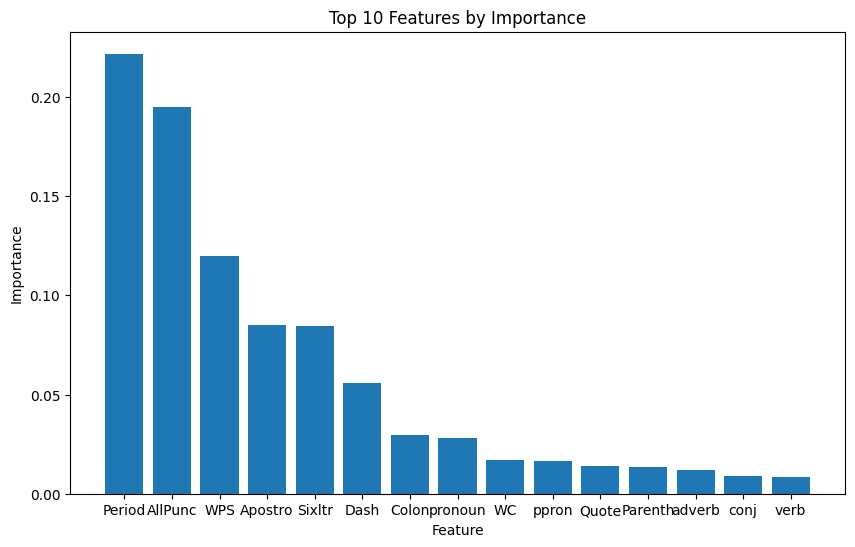

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(15), [val[1] for val in sorted_XGB[0:15]], tick_label=[val[0] for val in sorted_XGB[0:15]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Features by Importance")
plt.show()

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,Human or ChatGPT,Polarity,Subjectivity,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
93,0,0.125000,0.694231,164,65.84,74.89,48.21,88.08,164.00,18.90,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3771,1,-0.029870,0.372619,191,79.48,50.00,3.97,34.88,27.29,38.74,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.52,0.0,0.0
2636,1,0.144444,0.413889,164,67.40,78.61,14.43,48.39,27.33,26.22,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,1.22,0.0,0.0
1338,0,0.109946,0.578405,320,23.10,85.60,55.79,55.21,320.00,17.81,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
358,0,0.040377,0.380575,88,77.82,58.97,7.84,1.00,88.00,17.05,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0.363287,0.403263,91,89.62,77.92,49.19,84.10,91.00,15.38,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
1294,0,0.000000,0.100000,10,99.00,84.14,3.37,25.77,10.00,30.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
860,0,0.042500,0.511250,106,45.20,68.13,93.70,25.77,106.00,12.26,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3507,1,0.092806,0.388912,220,92.37,46.36,29.26,51.27,24.44,35.91,...,0.0,0.0,0.45,0.0,0.0,0.45,0.00,0.00,0.0,0.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df.drop(columns=['Human or ChatGPT'])
y = df['Human or ChatGPT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       351

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755



In [ ]:
df

,Human or ChatGPT,Polarity,Subjectivity,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
93,0,0.125000,0.694231,164,65.84,74.89,48.21,88.08,164.00,18.90,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3771,1,-0.029870,0.372619,191,79.48,50.00,3.97,34.88,27.29,38.74,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.52,0.0,0.0
2636,1,0.144444,0.413889,164,67.40,78.61,14.43,48.39,27.33,26.22,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,1.22,0.0,0.0
1338,0,0.109946,0.578405,320,23.10,85.60,55.79,55.21,320.00,17.81,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
358,0,0.040377,0.380575,88,77.82,58.97,7.84,1.00,88.00,17.05,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0.363287,0.403263,91,89.62,77.92,49.19,84.10,91.00,15.38,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
1294,0,0.000000,0.100000,10,99.00,84.14,3.37,25.77,10.00,30.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
860,0,0.042500,0.511250,106,45.20,68.13,93.70,25.77,106.00,12.26,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3507,1,0.092806,0.388912,220,92.37,46.36,29.26,51.27,24.44,35.91,...,0.0,0.0,0.45,0.0,0.0,0.45,0.00,0.00,0.0,0.0


In [ ]:
top_features_xgb = []
for i in range(15):
  top_features_xgb.append(sorted_XGB[i][0])
top_features_xgb

['Period',
 'AllPunc',
 'WPS',
 'Apostro',
 'Sixltr',
 'Dash',
 'Colon',
 'pronoun',
 'WC',
 'ppron',
 'Quote',
 'Parenth',
 'adverb',
 'conj',
 'verb']

In [ ]:
from sklearn.model_selection import cross_val_score

X_punc = df.drop(columns=top_features_xgb)
y = df['Human or ChatGPT']

X_train, X_test, y_train, y_test = train_test_split(X_punc, y, test_size=0.2, random_state=42)

model_punc = xgb.XGBClassifier()
model_punc.fit(X_train, y_train)

y_pred = model_punc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("SD of CV Scores:", cv_scores.std())

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       351

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

Cross-Validation Scores: [1.         1.         1.         1.         0.99734748 1.
 0.99469496 1.         1.         1.        ]
Mean CV Score: 0.9992042440318303
SD of CV Scores: 0.0016984414422898816


In [ ]:
import statsmodels.api as sm

X = df[top_features_xgb]
y = df['Human or ChatGPT']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

In [ ]:
X = df.drop(columns = ['Human or ChatGPT'])
y = df['Human or ChatGPT']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

In [ ]:
#lingustic dimensions
linguistic_features = ['pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate']

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df[linguistic_features]
y = df['Human or ChatGPT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("SD of CV Scores:", cv_scores.std())

Accuracy: 0.83841059602649
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       404
           1       0.82      0.83      0.83       351

    accuracy                           0.84       755
   macro avg       0.84      0.84      0.84       755
weighted avg       0.84      0.84      0.84       755

Cross-Validation Scores: [0.84656085 0.85714286 0.85449735 0.85185185 0.83554377 0.84350133
 0.87533156 0.84615385 0.8806366  0.88328912]
Mean CV Score: 0.857450914347466
SD of CV Scores: 0.015766440288396504


In [ ]:
#social processes
social_features = ['social', 'family', 'friend', 'female', 'male']

X = df[social_features]
y = df['Human or ChatGPT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("SD of CV Scores:", cv_scores.std())

Accuracy: 0.6251655629139072
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       404
           1       0.58      0.73      0.64       351

    accuracy                           0.63       755
   macro avg       0.64      0.63      0.62       755
weighted avg       0.64      0.63      0.62       755

Cross-Validation Scores: [0.63227513 0.61375661 0.65343915 0.64814815 0.63395225 0.61803714
 0.64986737 0.5862069  0.63660477 0.63395225]
Mean CV Score: 0.630623973727422
SD of CV Scores: 0.01916872937512515


In [ ]:
#cognitive processes
cognitive_features = ['cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept']

X = df[cognitive_features]
y = df['Human or ChatGPT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("SD of CV Scores:", cv_scores.std())

Accuracy: 0.7655629139072848
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       404
           1       0.73      0.78      0.76       351

    accuracy                           0.77       755
   macro avg       0.77      0.77      0.77       755
weighted avg       0.77      0.77      0.77       755

Cross-Validation Scores: [0.7962963  0.75132275 0.72751323 0.72486772 0.74535809 0.75331565
 0.74801061 0.77188329 0.73209549 0.73474801]
Mean CV Score: 0.7485411140583556
SD of CV Scores: 0.02080786134874637
